# <center> Systematic Trading Strategies with Machine Learning Algorithms </center>

## <center> Optional Session - Custom Loss Function
</center>
<center>
<table class="tfo-notebook-buttons" style="margin-left: auto; margin-right: auto;">
  <tr>
    <td style="text-align: center; vertical-align: middle;">
      <a target="_blank" href="https://hm-ai.github.io/Systematic_Trading_Strategies_with_Machine_Learning_Algorithms/">
        <img src="https://drive.google.com/uc?export=view&id=1hTIoxoea8RTLgKb1oE6_PFmtTNPGs5p4" height="50"/>
        <br>Course page
      </a>
    </td>
    <td style="text-align: center; vertical-align: middle;">
      <a target="_blank" href="https://colab.research.google.com/drive/13mV0JU-4BdoSavjBRxQ7wfLnjWyMw0ao?usp=sharing">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />
        <br>Run in Google Colab
      </a>
    </td>
  </tr>
</table>
</center>

In this Lecture we will deal with the following topics:

* [x] Tensors and operations
  * [x] Consant tensors
  * [x] Indexing
  * [x] Operations
  * [x] Using backend
  * [x] TF to Numpy and vice versa
  * [x] Conflicting types
  * [x] Variables
* [x] Computing Gradients with Autodiff
  * [x] Gradients wrt variables
  * [x] Gradients wrt constant tensors
  * [x] Gradients of multiple functions wrt variables
  * [x] Stop Gradient
* [x] Custom Loss Function
  * [x] Position of the problem
  * [x] Ex 3.1 Custom loss on the California Housing Dataset.
  * [x] Custom Loss on the California Housing dataset by subclassing `keras.losses.Loss`

# Setup

In [ ]:
# Import Modules
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# 1. Tensors and operations


### Constant Tensors

Q1.1 By using `tf.constant()`
* Create the following constant tensor of float32 numbers:

  $$
  A = \begin{pmatrix}
  1 & 2 \\
  3 & 4
  \end{pmatrix}
  $$

* Print the shape and the type of $A$

* Create a scalar tensor of type int and the same scalar tensor of type float32

In [ ]:
# The constant tensor A
A = tf.constant([[1., 2.],
                 [3., 4.]])

# Print the shape of A
print("The shape of A is", A.shape)

# The type of A
print("A is of type", A.dtype)

The shape of A is (2, 2)
A is of type <dtype: 'float32'>


In [ ]:
# The scalar tensor of type int
scalar_int = tf.constant(42)
print("scalar_int is of type", scalar_int.dtype)

# The scalar tensor of type float32
scalar_float = tf.constant(42, dtype = "float32")
print("scalar_float is of type", scalar_float.dtype)

scalar_int is of type <dtype: 'int32'>
scalar_float is of type <dtype: 'float32'>


### Indexing

It works pretty much like NumPy

Q1.2 Using `tf.constant()`

* Create the following float tensor:

  $$
  B = \begin{pmatrix}
  1 & 2 & 3  \\
  4 & 5 & 6 \\
  7 & 8 & 9 \\
  10 & 11 & 12
  \end{pmatrix}
  $$

* Create a sub-tensor C of B by taking the second and third column of B

* Create a tensor D by adding a dimension 1 to C. D will be of shape (4, 2, 1)

In [ ]:
# Create the tensor B
B = tf.constant([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9],
                 [10, 11, 12]], dtype = "float32")

B

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]], dtype=float32)>

In [ ]:
# Create the tensor C
C = B[:, 1:]
C

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 2.,  3.],
       [ 5.,  6.],
       [ 8.,  9.],
       [11., 12.]], dtype=float32)>

In [ ]:
# Create the tensor D

D = C[:, :, tf.newaxis]
D

<tf.Tensor: shape=(4, 2, 1), dtype=float32, numpy=
array([[[ 2.],
        [ 3.]],

       [[ 5.],
        [ 6.]],

       [[ 8.],
        [ 9.]],

       [[11.],
        [12.]]], dtype=float32)>

### Operations

Q1.3 Using `tf.add()`, `tf.square()`, `tf.matmul()`, `tf.transpose`, `tf.multiply()`, `tf.math.log`, `tf.reduce_sum()`, `tf.reduce_mean()`, `tf.math.reduce_std()`, create the following matrices:

  * $E$ where you add 1 to each component of $B$.

  * $F$ where you take the square of each dimension of $B$.

  * $G = B B^T$.

  * $H = B \circ B$.

  * $I$ that results from taking the logarithm of each element of H.

  * $S$ that results from summing all the rows of the matrix $B$ Which is equivalent to `np.mean(B, axis = 0` in NumPy.

  * $B_{\text{norm}}$ that results from normalizing the matrix B (mean of each column = 0, and std = 1)

In [ ]:
# Computing E
E = tf.add(B, 1)
E

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.],
       [ 8.,  9., 10.],
       [11., 12., 13.]], dtype=float32)>

In [ ]:
# Matrix F = square(B)
F = B**2
F

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.],
       [ 49.,  64.,  81.],
       [100., 121., 144.]], dtype=float32)>

In [ ]:
# Computing F
F = tf.square(B)
F

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.],
       [ 49.,  64.,  81.],
       [100., 121., 144.]], dtype=float32)>

In [ ]:
# Matrix G = B B^T
G = B @ tf.transpose(B)
G

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 14.,  32.,  50.,  68.],
       [ 32.,  77., 122., 167.],
       [ 50., 122., 194., 266.],
       [ 68., 167., 266., 365.]], dtype=float32)>

In [ ]:
# Another way of compuyting G
G = tf.matmul(B, tf.transpose(B))
G

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 14.,  32.,  50.,  68.],
       [ 32.,  77., 122., 167.],
       [ 50., 122., 194., 266.],
       [ 68., 167., 266., 365.]], dtype=float32)>

In [ ]:
# Matrix H = B \circ B (Hadamard Product)
H = B*B
H

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.],
       [ 49.,  64.,  81.],
       [100., 121., 144.]], dtype=float32)>

In [ ]:
# Another way of computing H
H = tf.multiply(B, B)
H

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.],
       [ 49.,  64.,  81.],
       [100., 121., 144.]], dtype=float32)>

In [ ]:
# Matrix I = log(H)
I = tf.math.log(H)
I

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[0.       , 1.3862944, 2.1972246],
       [2.7725887, 3.218876 , 3.583519 ],
       [3.8918204, 4.158883 , 4.394449 ],
       [4.6051702, 4.7957907, 4.9698133]], dtype=float32)>

In [ ]:
# Matrix S = sum(B, axis = 0)
S = tf.reduce_sum(B, axis = 0)
S

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([22., 26., 30.], dtype=float32)>

In [ ]:
# Matrix B_norm
B_norm = (B - tf.reduce_mean(B, axis = 0, keepdims = True))/tf.math.reduce_std(B, axis = 0, keepdims = True)
B_norm

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-1.3416408, -1.3416408, -1.3416408],
       [-0.4472136, -0.4472136, -0.4472136],
       [ 0.4472136,  0.4472136,  0.4472136],
       [ 1.3416408,  1.3416408,  1.3416408]], dtype=float32)>

### Using `keras.backend`

In [ ]:
from tensorflow.keras import backend as K

Q1.4 Calculate all the previous operations using the operations `+`, `-` and `*` or the backend `tensorflow.keras.backend`
  * $E$ where you add 1 to each component of $B$.

  * $F$ where you take the square of each dimension of $B$.

  * $G = B B^T$.

  * $H = B \circ B$.

  * $I$ that results from taking the logarithm of each element of H.

  * $S$ that results from summing all the rows of the matrix $B$ Which is equivalent to `np.mean(B, axis = 0` in NumPy.

  * $B_{\text{norm}}$ that results from normalizing the matrix B (mean of each column = 0, and std = 1)

In [ ]:
# Matrix E = B + 1
E = B + 1
E

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.],
       [ 8.,  9., 10.],
       [11., 12., 13.]], dtype=float32)>

In [ ]:
# Matrix F = B**2
F = B**2
F

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.],
       [ 49.,  64.,  81.],
       [100., 121., 144.]], dtype=float32)>

In [ ]:
# Matrix G = B B^T
G = K.dot(B, K.transpose(B))
G

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 14.,  32.,  50.,  68.],
       [ 32.,  77., 122., 167.],
       [ 50., 122., 194., 266.],
       [ 68., 167., 266., 365.]], dtype=float32)>

In [ ]:
# Matrix H = B \circ B
H = B*B
H

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.],
       [ 49.,  64.,  81.],
       [100., 121., 144.]], dtype=float32)>

In [ ]:
# Matrix I = Log(H)
I = K.log(H)
I

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[0.       , 1.3862944, 2.1972246],
       [2.7725887, 3.218876 , 3.583519 ],
       [3.8918204, 4.158883 , 4.394449 ],
       [4.6051702, 4.7957907, 4.9698133]], dtype=float32)>

In [ ]:
# S = sum(B, axis = 0)
S = K.sum(B, axis = 0)
S

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([22., 26., 30.], dtype=float32)>

In [ ]:
# B_norm
B_norm = (B - K.mean(B, axis = 0, keepdims = True))/K.std(B, axis = 0, keepdims = True)
B_norm

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-1.3416408, -1.3416408, -1.3416408],
       [-0.4472136, -0.4472136, -0.4472136],
       [ 0.4472136,  0.4472136,  0.4472136],
       [ 1.3416408,  1.3416408,  1.3416408]], dtype=float32)>

### TF to NumPy and vice versa

It is straightforward to go from TF to NumPy and vice versa.

Q1.5 By using `tensor.numpy()` and `tf.constant()`:

* Create a random numpy array X of shape (2, 2) of float numbers.
* Convert X into a constant tensor
* What is the default precision of a constant tensor created from a numpy array ?
* Create a constant tensor Y
* Convert it into a numpy array
* What is the precision of the resulting numpy array Y ?

In [ ]:
# Create a random numpy array
X_numpy = np.random.random((2, 2))

# Convert it into a constant tensor
X_tensor = tf.constant(X_numpy)

# Print the precision of the resulting tensor
print("The default precision of numpy arrays is {}".format(X_tensor.dtype))

# Create a constant tensor
Y_tensor = tf.constant([[1., 2.], [3., 4.]])

# Re-convert it into a numpy array
Y_numpy = Y_tensor.numpy()
# Print the precision of the resulting numpy array
print("The default precision of TF constant tensors is {}".format(Y_numpy.dtype))

The default precision of numpy arrays is <dtype: 'float64'>
The default precision of TF constant tensors is float32


**When creating a tensor from a NumPy array, make sure to set `dtype = tf.float32`**, this precision is more than enough for neural networks

### Conflicting Types

Q1.6 Try to add X_tensor and Y_tensor

In [ ]:
try:
    X_tensor + Y_tensor
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:AddV2] name: 


Q1.7 Use `tf.cast()` to convert X_tensor into a float32 and add it to Y_tensor

In [ ]:
tf.cast(X_tensor, dtype = tf.float32) + Y_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.3745401, 2.9507143],
       [3.731994 , 4.5986586]], dtype=float32)>

### Variables

We cannot use immutable tensors to implement the weights of a neural network since they need to be updated by backpropagation. Instead, we use `tf.Variable`

We have the same properties as the other tensors. It can also be modified in place using `assign()`

For instance, $ X \leftarrow X + 1 $ is equivalent to `X.assign(X+1)`

Q1.7 We want to minimize the loss function $ x \mapsto x^2$.

* Initialize the minimizer x_star randomly
* Perform a Gradient Descent by using a learning rate $\eta = 10^{-2}$

  $$x^* \leftarrow  x^* - 2  \eta x^*$$

* Plot the loss at each update of x_star

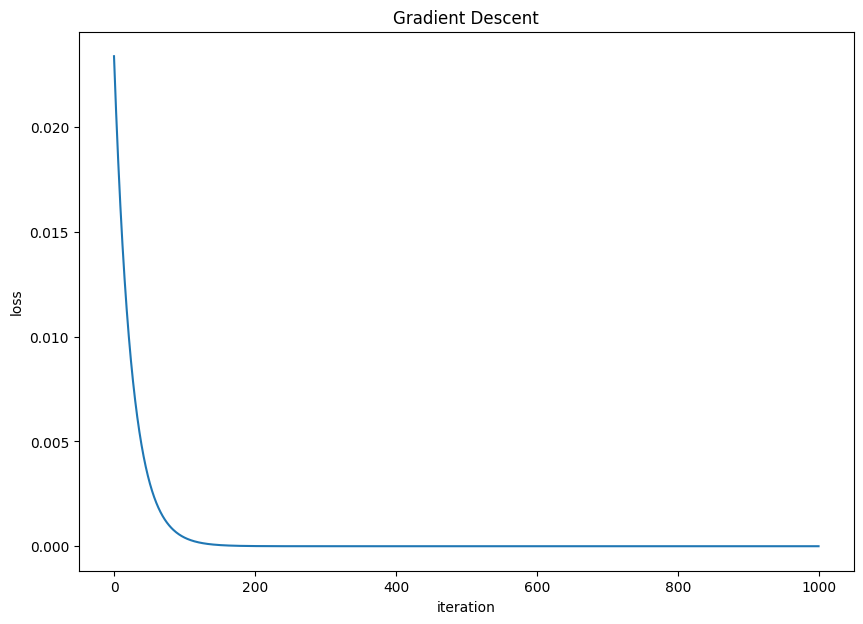

In [ ]:
# Learning rate
eta = 1e-2
# Initialize x_star
x_star = tf.Variable(np.random.random(1), dtype = tf.float32)
# Gradient Descent
losses = []
for i in range(1000):
  # Update equation
  x_star.assign(x_star - 2*eta*x_star)
  # Compute loss
  loss = tf.square(x_star)
  # Append losses
  losses.append(loss.numpy()[0])
# Plot the losses
plt.figure(figsize = (10, 7))
plt.plot(losses)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Gradient Descent")
plt.show()

# 2. Computing Gradients with Autodiff

### Gradients wrt variables


Let us consider $a \in \mathbb{R}^{d_1}$ and $A \in \mathbb{R}^{d_2 \times d_2}$. Let us also consider the following function: $f: (w_1, w_2) \in \mathbb{R}^{d_1} \times \mathbb{R}^{d_2} \mapsto  a^T w_1  + w_2^T A w_2$

We know that $\nabla f(w_1) = a$ and $\nabla f(w_2) = A w_2 + A^T w_2$

* Create two constant tensors a and A.
* Compute $\nabla f(w_1)$ and $\nabla f(w_2)$ using  the following code:
  ```python
  with tf.GradientTape() as tape:
    z = f(w_1, w_2)
  grad_w_1, grad_w_2 = tape.gradient(z, [w_1, w_2])
  ```
* Compare the analytical expressions of the gradients and the computational gradients


In [ ]:
# Hyperparameters
d_1 = 128
d_2 = 256

# Define the constant matrices a and A
a = tf.constant(np.random.randn(d_1, 1), dtype = tf.float32)
A = tf.constant(np.random.randn(d_2, d_2), dtype = tf.float32)


# Define f
def f(w_1, w_2):
  return tf.add(tf.matmul(tf.transpose(a), w_1), tf.matmul(tf.transpose(w_2), tf.matmul(A, w_2)))


# Compute the gradients
w_1 = tf.Variable(np.random.randn(d_1, 1), dtype = tf.float32)
w_2 = tf.Variable(np.random.randn(d_2, 1), dtype = tf.float32)
with tf.GradientTape() as tape:
  z = f(w_1, w_2)
grad_w_1, grad_w_2 = tape.gradient(z, [w_1, w_2])


# Analytical expressions of gradiends
analytical_grad_w_1 = a
analytical_grad_w_2 = tf.add(tf.matmul(A, w_2), tf.matmul(tf.transpose(A), w_2))

# Print results
diff_grads_w_1 = tf.reduce_sum(analytical_grad_w_1 - grad_w_1).numpy()
print("The difference between the analytical and the computational gradient wrt w_1 is ", diff_grads_w_1)

diff_grads_w_2 = tf.reduce_sum(analytical_grad_w_2 - grad_w_2).numpy()
print("The difference between the analytical and the computational gradient wrt w_2 is ", diff_grads_w_2)

The difference between the analytical and the computational gradient wrt w_1 is  0.0
The difference between the analytical and the computational gradient wrt w_2 is  4.6491623e-05


### Gradients wrt constant tensors


---
Remarks:

* The tape is automatically erased immediately after you call its `gradient()` method. If you call the method twice, you will get a RunTime Error.
* If you need to call the `gradient` more that once, use `tf.GradientTape(persistent = True)` and delete the tape using `del tape` when you're done.
* The tape will only track operations involving variables. Any gradient wrt other than a variable will return None, unless you force the tape to watch it using `tape.watch()`

---

* Create the following function $g: (w, \lambda) \in \mathbb{R}^d \times \mathbb{R} \mapsto w^T a + \lambda ||w||^2$ where a and $\lambda$ are constant tensors and $w$ a Variable tensor. Then compute the gradient of g wrt lambda and $w$ and compare to the analytical expressions of these tensors

In [ ]:
# Hyperparameters
d = 128

# Create the constant tensors
a = tf.constant(np.random.randn(d, 1), dtype = tf.float32)
lambda_value = tf.constant(1e-4)

# create the function g
def g(w, lambda_value):
  return tf.add(tf.matmul(tf.transpose(w), a), lambda_value*tf.matmul(tf.transpose(w), w))

# Take the gradient wrt w

w = tf.Variable(np.random.randn(d, 1), dtype = tf.float32)
with tf.GradientTape() as tape:
  tape.watch(lambda_value)
  z = g(w, lambda_value)

grad_w, grad_lambda = tape.gradient(z, [w, lambda_value])


# Analytical expressions of gradiends
# grad_w = a + 2 lambda w
# grad_lambda = w^T w
analytical_grad_w = a + 2*lambda_value*w
analytical_grad_lambda = tf.transpose(w) @ w

# Print result
diff_grad_w = tf.reduce_sum(analytical_grad_w - grad_w).numpy()
print("The difference between the analytical and computational result of the gradient wrt w is: ", diff_grad_w)

diff_grad_lambda = tf.reduce_sum(analytical_grad_lambda - grad_lambda).numpy()
print("The difference between the analytical and computational result of the gradient wrt lambda is: ", diff_grad_lambda)

The difference between the analytical and computational result of the gradient wrt w is:  2.4959445e-07
The difference between the analytical and computational result of the gradient wrt lambda is:  0.0


### Gradients of multiple functions wrt variables

* Create 3 easy functions $z_1, z_2, z_3$ of two variables $w_1, w_2$. And show that the following code computes the gradient of $z_1 + z_2 + z_3$ instead of the three gradients.
  ```python
  with tf.GradientTape() as tape:
    z_1 = f(w_1, w_2)
    z_2 = g(w_1, w_2)
    z_3 = h(w_1, w_2)
  tape.gradient([z_1, z_2, z_3], [w_1, w_2])
  ```

In [ ]:
# gradient of [z_1, z_2, z_3] wrt [w_1, w_2]
w_1, w_2 = tf.Variable(3.), tf.Variable(5.)

with tf.GradientTape() as tape:
  z_1 = w_1**2 - 3*w_2
  z_2 = w_1**3 - 2*w_2
  z_3 = w_1**4 + w_2

grad = tape.gradient([z_1, z_2, z_3], [w_1, w_2])

# gradient of sum_i z_i with respect to [w_1, w_2]
w_1, w_2 = tf.Variable(3.), tf.Variable(5.)

with tf.GradientTape() as tape:
  z_1 = w_1**2 - 3*w_2
  z_2 = w_1**3 - 2*w_2
  z_3 = w_1**4 + w_2
  z_4 = z_1 + z_2 + z_3

grad_sum = tape.gradient(z_4, [w_1, w_2])

# Show it's the same gradient computed:
tf.equal(grad, grad_sum)

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True,  True])>

* by adding the argument `persistent = True` to `tf.GradientTape()` compute all the three gradients (of shape (2,)) and stack them to get a tensor of shape (3, 2)

* Sum according to the `axis = 0` to get the previous gradient

In [ ]:
w_1, w_2 = tf.Variable(3.), tf.Variable(5.)

with tf.GradientTape(persistent = True) as tape:
  z_1 = w_1**2 - 3*w_2
  z_2 = w_1**3 - 2*w_2
  z_3 = w_1**4 + w_2

# Stack the 3 gradient vectors of shape (2,)
gradients = tf.stack([tape.gradient(z, [w_1, w_2]) for z in [z_1, z_2, z_3]], axis = 0)
del tape

# Sum of gradient
sum_gradients = tf.reduce_sum(gradients, axis = 0)
tf.equal(grad, sum_gradients)

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True,  True])>

### Stop Gradient

We would like to stop gradients from backpropagating through some part of neural network. For that, we use `tf.stop_gradient()`. The function returns its input during **forward propagation** and does not let gradients through during backpropagation

* Create the following function $f (w_1, w_2) \mapsto w_1^2 - w_1 w_2$ with the stop gradient function applied to the part $ - w_1 w2$

For values $w_1 = 2$ and $w_2 = -1$, we should expect $f(w_1, w_2) = 6$ and $\nabla f(w_1) = 4$

In [ ]:
# Define the function f with the stop gradient
def f(w_1, w_2):
  return w_1**2 + tf.stop_gradient(- w_1*w_2)

# Compute gradient
w_1, w_2 = tf.Variable(2.), tf.Variable(-1.)

with tf.GradientTape() as tape:
  z = f(w_1, w_2)
  print("The value of f(w_1, w_2) is : ", z.numpy())

grad_w_1, grad_w_2 = tape.gradient(z, [w_1, w_2]) # grad_w_2 : None
print("The gradient wrt w_1 is ", grad_w_1.numpy())

The value of f(w_1, w_2) is :  6.0
The gradient wrt w_1 is  4.0


# 3. Custom Loss Function

### Position of the problem

What if the loss we want to use is not available in Keras API ?


* Imagine we are performing a regression task on a noisy dataset.

  * If we use the mse as a loss, the outliers will affect our training resulting in an imprecise model.

  * If we use the mae as a loss, our training might take a while before it converges.

* One way of handling this issue is to introduce the **Huber Loss** which has a quadratic loss for "normal" values and a linear loss for outliers.

---
Let $y$ and $p$ be the target tensor and the output tensor, both of shape $(n_{\mathcal{B}},)$ (the batch size)

We define the **Huber Loss** as follows:


$$ \mathcal{L}_{\epsilon}(y, p) = \frac{1}{n_{\mathcal{B}}} \sum\limits_{i \in \mathcal{B}} \left( \underbrace{(\epsilon |y_i - p_i| - \frac{1}{2} \epsilon^2) \mathbb{1}_{ \{|y_i - p_i| \geq \epsilon \}} + \frac{1}{2} (y_i - p_i)^2 \mathbb{1}_{ \{|y_i - p_i| < \epsilon \}}}_{\mathcal{\mathcal{L}_{\epsilon}(y_i, p_i)}} \right) $$

---



### Ex 3.1 Custom loss on the California Housing Dataset.




* Load the dataset `fetch_california_housing` from `sklearn.datasets`
* Split the data into train and test using `train_test_split` from `sklearn.model_selection` and scale your data using`StandardScaler` from `sklearn.preprocessing`
* Define the Huber loss function called `huber_loss` (on each instance) and define a function called `define_huber_loss` that takes as input $\epsilon$ and that returns your loss $\mathcal{L}_{\epsilon}$
* Plot the Huber Loss $\mathcal{L}_{\epsilon}(0, .)$ for $\epsilon \in \{0.5, 1, 2 \}$
* Create a basic Neural Network with one hidden layer
* Compile and fit your model by specifying the new loss for $\epsilon = 1.0$
* Plot the training and validation loss
* Save your model using `model.save("model.h5")`
* Load your model. Notice that you have to specify the threshold $\epsilon$ as follows:
  ```python
  model = load_model("model.h5",
                    custom_objects = {"huber_loss" : def_huber_loss(1.)}
  ```
* Evaluate your model on the test data

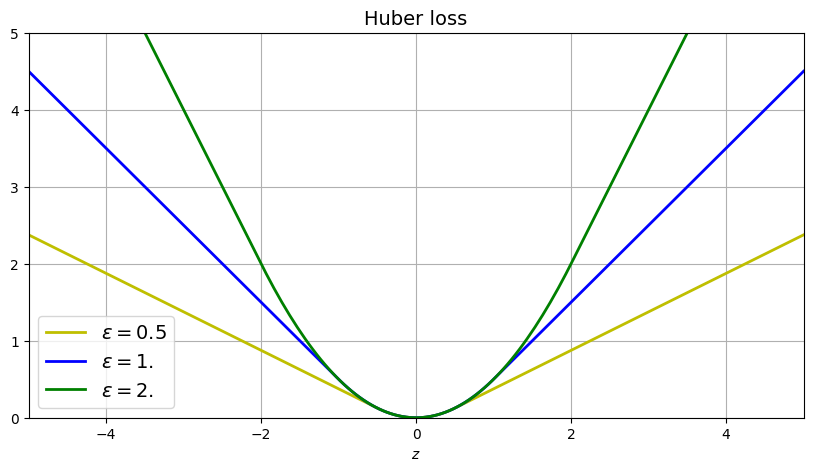

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

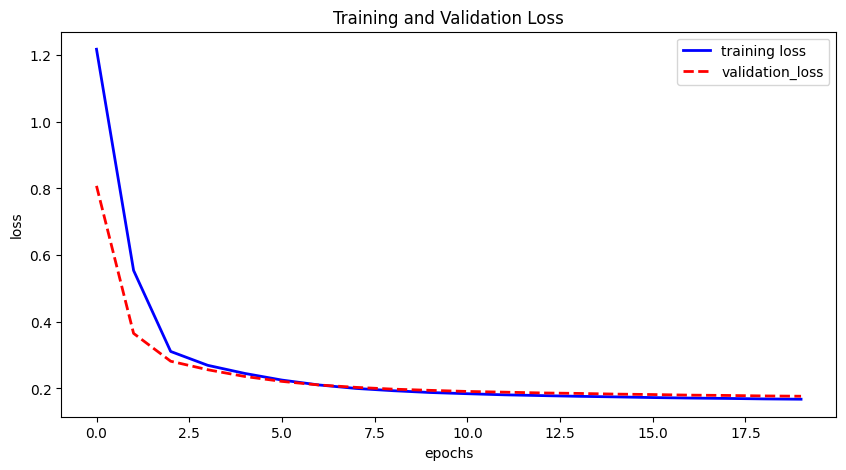

The mae of the test data is 0.44131436944007874


In [ ]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

# Fix the seed
tf.random.set_seed(42)
np.random.seed(42)

# Hyperparameters
HIDDEN_SIZE = 32
BATCH_SIZE = 128
EPOCHS = 20

# Load the data
dataset = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, # Features (N, D)
                                                    dataset.target[:, None], # Targets reshapes (N, 1)
                                                    random_state = 42) # To fix the seed
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Define the Huber Loss
def define_huber_loss(epsilon = 1.0):
  def huber_loss(y, p):
    error = tf.abs(y-p)
    condition = error < epsilon
    quadratic_loss = (1/2)*(error**2)
    linear_loss = epsilon*error - (1/2)*(epsilon**2)
    return tf.where(condition, quadratic_loss, linear_loss)
  return huber_loss

# Plot the Huber Loss
plt.figure(figsize=(10, 5))
z = np.linspace(-5, 5, 200)
plt.plot(z, define_huber_loss(epsilon=0.5)(0, z), "y-", linewidth=2, label="$\epsilon = 0.5$")
plt.plot(z, define_huber_loss(epsilon=1.0)(0, z), "b-", linewidth=2, label="$\epsilon = 1.$")
plt.plot(z, define_huber_loss(epsilon=2.0)(0, z), "g-", linewidth=2, label="$\epsilon = 2.$")
plt.axis([-5, 5, 0, 5])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

# Create a basic Neural Network
model = Sequential([Dense(HIDDEN_SIZE, activation = "relu", input_shape = (X_train.shape[1],)),
                    Dense(1)])

model.summary()

# Compile the model
model.compile(optimizer = "adam",
              loss = define_huber_loss(1.0),
              metrics = ["mae"])

# Fit the model to the data
history = model.fit(X_train, y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_split = 0.33,
                    verbose = 0)

# Plot the training and validation loss
plt.figure(figsize = (10, 5))
plt.plot(history.history["loss"], "b-", linewidth = 2.0, label = "training loss")
plt.plot(history.history["val_loss"], "r--", linewidth = 2.0, label = "validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Save the model
model.save("model.h5")

# Load the model
model_loaded = load_model("model.h5",
                          custom_objects = {"huber_loss" : define_huber_loss(1.0)})

# Evaluate the model
loss, mae = model_loaded.evaluate(X_test, y_test,
                                  verbose = 0)
print("The mae of the test data is", mae)

### Ex 3.2 Custom Loss on the California Housing dataset by subclassing `keras.losses.Loss`

In order to avoid specifying the threshold $\epsilon$ when loading the model, we can create the custom loss by subclassing `keras.losses.Loss`.

Same as before:

* Load the dataset
* Split the data into train and test using and scale it
* Define the Huber loss by sublassing `keras.losses.Loss` as follows:
  ```python
  class HuberLoss(keras.losses.Loss):
    def __init__(self, epsilon = 1.0, **kwargs):
      super().__init__(**kwargs)
      ###### TO DO #####
      # Initialize epsilon
    def call(self, y, p):
      ##### TO DO #####
      # Define your huber loss function
    def get_config(self):
      base_config = super().get_config()
      return {**base_config, "epsilon": self.epsilon}
  ```
* Create the same Neural Network with one hidden layer
* Compile and fit your model by specifying the new loss for $\epsilon = 1.0$
* Plot the training and validation loss
* Save your model using `model.save("model.h5")`
* Load your model. Notice that you don't have to specify the threshold $\epsilon$ since when the model is saved, Keras calls loss instance's `get_config()` method and saves the config as JSON in the HDF5 file.   
* Evaluate your model on the test data





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

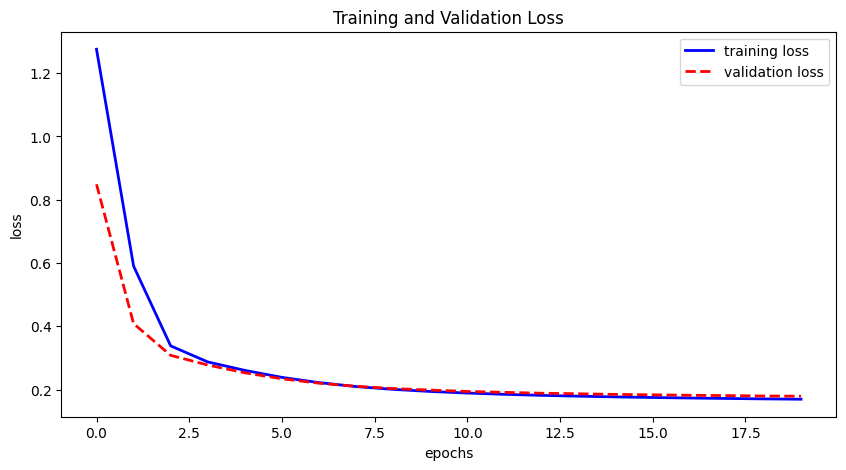

The mae of the test data is: 0.4449753761291504


In [ ]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# Hyperparameters
HIDDEN_SIZE = 32
BATCH_SIZE = 128
EPOCHS = 20

# Set the seed
tf.random.set_seed(42)
np.random.seed(42)

# Load the data
dataset = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(dataset.data,
                                                    dataset.target[:, None],
                                                    random_state = 42)

# Scale the data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Create the model
model = Sequential([Dense(HIDDEN_SIZE, activation = "relu", input_shape = (X_train.shape[1],)),
                    Dense(1)])

model.summary()

# Define the loss
class HuberLoss(keras.losses.Loss):
  def __init__(self, epsilon, **kwargs):
    super().__init__(**kwargs)
    self.epsilon = epsilon

  def call(self, y, p):
    error = tf.abs(y - p)
    condition = error < self.epsilon
    linear_loss = self.epsilon*error - (1/2)*(self.epsilon**2)
    quadratic_loss = (1/2)*(error**2)
    return tf.where(condition, quadratic_loss, linear_loss)

  def get_config(self):
    base_config = super().get_config()
    return {**base_config,
            "epsilon" : self.epsilon}

# Compile the model
model.compile(optimizer = "adam",
              loss = HuberLoss(1.0),
              metrics = ["mae"])

# Fit the model to the data
history = model.fit(X_train, y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_split = 0.33,
                    verbose = 0)

# Plot the training and valdiation data
plt.figure(figsize = (10, 5))
plt.plot(history.history["loss"], "b-", linewidth = 2.0, label = "training loss")
plt.plot(history.history["val_loss"], "r--", linewidth = 2.0, label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


# Save the model
model.save("model.h5")


# Load the model
model_loaded = load_model("model.h5",
                          custom_objects = {"HuberLoss": HuberLoss})
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test,
                           verbose = 0)
print("The mae of the test data is:", mae)

In [ ]:
HL = HuberLoss(2.0)
HL.get_config()

{'name': 'huber_loss_1', 'reduction': 'sum_over_batch_size', 'epsilon': 2.0}